## About Dataset

Heart disease is the number one cause of death globally. Heart disease is concertedly contributed by hypertension, diabetes, overweight and unhealthy lifestyles.

Here I have mentioned some questions that we are going to solve during this video.

1. Importing the Libraries
2. Importing the Dataset
3. Taking Care of Missing Values
4. Taking Care of Duplicate Values
5. Data Processing
6. Encoding Categorical Data
7. Feature Scaling
8. Splitting The Dataset Into The Training Set And Test Set
9. Logistic Regression
10. SVC
11. KNeighbors Classifier
Non-Linear ML Algorithms
12. Decision Tree Classifier
13. Random Forest Classifier
14. Gradient Boosting Classifier
15. Prediction on New Data
16. Save Model Usign Joblib
17. Creating GUI

### Importing the Libraries

In [1]:
import pandas as pd

### 2.Importing the Dataset

In [2]:
data=pd.read_csv('C:\\Users\\Hafiz Imran\Desktop\\Projects with Matchin learning\\Heart Diseas Prediction using ML(with GUI)\\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 3.Taking Care of Missing Values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4.Taking Care of Duplicate Values

In [5]:
data_dub=data.duplicated().any()
print(data_dub)

True


In the above cell, the result is True, indicating that our data contains some duplicate values.

Lets drop the duplicate values in our data

In [6]:
data=data.drop_duplicates()
data.shape

(302, 14)

In [7]:
data_dub=data.duplicated().any()
print(data_dub)

False


### 5.Data Processing

In [8]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6.Encoding Categorical Data


In this section, we will create binary vectors for all categorical columns. This is necessary because some machine learning models can only understand numerical values, and not all models follow a numerical order. For example, the "CP" column has 4 unique values, so it will be converted into 4 separate columns representing dummy variables. By doing this, we can examine the correlations between these columns and other variables. 

In [11]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 7.Feature Scaling

In linear regression, it is necessary to perform feature scaling. This is because four columns in our dataset, namely **age,** **trestbps,** **chol,** and **thalach,** do not have the same scales. Therefore, we need to perform feature scaling on these columns. The remaining data does not require feature scaling.  

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 8.Splitting The Dataset Into The Training Set And Test Set

In [17]:
X=data.drop('target',axis=1)

In [18]:
y=data['target']


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

### 9.Logistic Regression

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0



Our dataset contains a target column with two values **(0 and 1)**, indicating that our problem is a classification problem. In this analysis, we will apply various classification algorithms and evaluate their performance based on accuracy. Our objective is to identify the best model for our dataset.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred1=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### 10.SVC

Spport vector classifire

In [28]:
from sklearn import svm

In [29]:
svm=svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2=svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

### 11.KNeighbors Classifier Non-Linear ML Algorithms

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [38]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [39]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [40]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score.append(accuracy_score(y_test,y_pred))

In [41]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.8032786885245902]

### Non-Linear ML Algorithms

In [88]:
data=pd.read_csv('C:\\Users\\Hafiz Imran\Desktop\\Projects with Matchin learning\\Heart Diseas Prediction using ML(with GUI)\\heart.csv')

In [89]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [90]:
data=data.drop_duplicates()

In [91]:
data.shape

(302, 14)

In [92]:
X=data.drop('target',axis=1)
y=data['target']

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 12.Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt=DecisionTreeClassifier()

In [96]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred4=dt.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

### 13.Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
Rm=RandomForestClassifier()

In [101]:
Rm.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
y_pred5=Rm.predict(X_test)

In [111]:
accuracy_score(y_test,y_pred5)

0.819672131147541

### 14.Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gb=GradientBoostingClassifier()

In [107]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [112]:
y_pred6=gb.predict(X_test)

In [113]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [115]:
Final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                          accuracy_score(y_test,y_pred2),
                                                                          accuracy_score(y_test,y_pred3),
                                                                          accuracy_score(y_test,y_pred4),
                                                                          accuracy_score(y_test,y_pred5),
                                                                          accuracy_score(y_test,y_pred6)]})

In [116]:
Final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.786885
4,RF,0.819672
5,GB,0.803279


In [117]:
import seaborn as sns

C:\Users\Hafiz Imran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

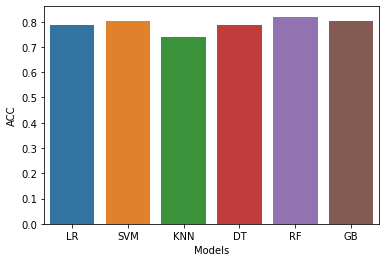

In [120]:
sns.barplot(Final_data['Models'],Final_data['ACC'])

#### Let's train our best model for the entire dataset.

In [121]:
X=data.drop('target',axis=1)
y=data['target']

In [123]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [126]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 15.Prediction on New Data

In [125]:
import pandas as pd

In [127]:
New_data=pd.DataFrame({'age':52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,
                       'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])

In [128]:
New_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [130]:
p=rf.predict(New_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease


### 16.Save Model Usign Joblib

In [148]:
import joblib

In [149]:
joblib.dump(rf,'Model_Joblib_Heart')

['Model_Joblib_Heart']

In [150]:
model=joblib.load('Model_Joblib_Heart')

In [151]:
model.predict(New_data)

array([0], dtype=int64)

### 17.Creating GUI

In [2]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(R1.get())
    p2=int(R2.get())
    p3=int(R3.get())
    p4=int(R4.get())
    p5=int(R5.get())
    p6=int(R6.get())
    p7=int(R7.get())
    p8=int(R8.get())
    p9=int(R9.get())
    p10=float(R10.get())
    p11=int(R11.get())
    p12=int(R12.get())
    p13=int(R13.get())
               
    model=joblib.load("Model_Joblib_Heart")
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    if result==[0]:
        Label(master,text="NO Heart Disease:").grid(row=15,column=1)
    else:
        Label(master,text=" Posibility of Heart Disease: ").grid(row=15,column=1)
        
    
    #Label(master,text="Heart Disease Predition: ").grid(row=14)
    #Label(master,text=result).grid(row=15)
 
     
master= Tk ()
master.config(bg="white")
master.title("Heart Disease Predition using ML")
master.geometry("450x400")

label=Label(master,text="Heart Disease Predition",bg="black",fg="white",font=('arial', 12, 'bold')).grid(row=0,columnspan=2)

label=Label(master,text="Enter Your Age:",font=('arial', 10, 'bold')).grid(row=1)
label=Label(master,text="Male Or Female \n[1-For Male/ 0-For Female]",font=('arial', 10, 'bold')).grid(row=2)
label=Label(master,text="Enter value of cp :",font=('arial', 10, 'bold')).grid(row=3)
label=Label(master,text="Enter value of trestbps:",font=('arial', 10, 'bold')).grid(row=4)
label=Label(master,text="Enter value of chol",font=('arial', 10, 'bold')).grid(row=5)
label=Label(master,text="Enter value of fbs ",font=('arial', 10, 'bold')).grid(row=6)
label=Label(master,text="Enter value of restecg ",font=('arial', 10, 'bold')).grid(row=7)
label=Label(master,text="Enter value of thalach ",font=('arial', 10, 'bold')).grid(row=8)
label=Label(master,text="Enter value of exang ",font=('arial', 10, 'bold')).grid(row=9)
label=Label(master,text="Enter value of oldpeak ",font=('arial', 10, 'bold')).grid(row=10)
label=Label(master,text="Enter value of slope ",font=('arial', 10, 'bold')).grid(row=11)
label=Label(master,text="Enter value of ca ",font=('arial', 10, 'bold')).grid(row=12)
label=Label(master,text="Enter value of thal ",font=('arial', 10, 'bold')).grid(row=13)

R1=Entry(master)
R2=Entry(master)
R3=Entry(master)
R4=Entry(master)
R5=Entry(master)
R6=Entry(master)
R7=Entry(master)
R8=Entry(master)
R9=Entry(master)
R10=Entry(master)
R11=Entry(master)
R12=Entry(master)
R13=Entry(master)

R1.grid(row=1,column=1)
R2.grid(row=2,column=1)
R3.grid(row=3,column=1)
R4.grid(row=4,column=1)
R5.grid(row=5,column=1)
R6.grid(row=6,column=1)
R7.grid(row=7,column=1)
R8.grid(row=8,column=1)
R9.grid(row=9,column=1)
R10.grid(row=10,column=1)
R11.grid(row=11,column=1)
R12.grid(row=12,column=1)
R13.grid(row=13,column=1)


Button(master,text="Predict",font=('arial', 10, 'bold'),command=show_entry_fields).grid()




mainloop()